In [75]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

In [76]:
mu=13.20
sigma=2.50

n=40
samp_mean=12.20

h0=13.20

h1<13.20

In [77]:
#n>30 'dan büyük ve populasyon sigma biiyorum bu nedenle z testi yapıyorum. 
z_test=(samp_mean-mu)/(sigma/np.sqrt(n))
z_test

-2.5298221281347035

In [78]:
pvalue=stats.norm.cdf(z_test)
pvalue

0.005706018193000826

one_tail dist. kullanıyoruz çünkü sadece 13.20'den düşük olma durumu sorgulanıyor. bu durumda pvalue 0.01 olur. eğer çift yönlü olsaydı  α/2'den p value 0.005 oalcaktı. 
p value 0.01'den küçük olduğu için h0 reject edilir. yani suclayamayız.

2. yöntem z kritiklerin tablodan karşılaştırılarak  hipotezlerin değerlendirilmesi. 

z_test=-2.5298221281347035 ve alpha 0.01'de z tablosundan bakılırsa z_kritik = -2.35

z_test < z_kritik h0 reject edilir. yani 13.20'den küçük olabilirmiş bu durumda firmayı suclayamayız.

EXERCISE 2: Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

birinden bağımsız 2 olay var two independent analizi yapacağız. 

In [79]:
dfsoil = pd.read_csv("soil - Sheet1.csv", sep = ",")

h0: mu1 = mu2

h1: mu1! = mu2

In [80]:
dfsoil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


soil1'de NaNlar var ya bunları dropna ile silerim yada fillna ile mantıklı bir doldurma yapabilir. fakat eğer silersem Nanları bunun karşısında soil2 verilerinide kaybedeceğimden silme değil doldurmayı tercih ettim . bukoşullarda mantıklı doldurma olarakta meane kadar verdim.

In [81]:
dfsoil.fillna(dfsoil.Soil1.mean(), inplace=True)

In [82]:
dfsoil.shape

(35, 2)

In [83]:
dfsoil.Soil1.mean()

1.6918

In [84]:
dfsoil.Soil2.mean()

1.4171142857142855

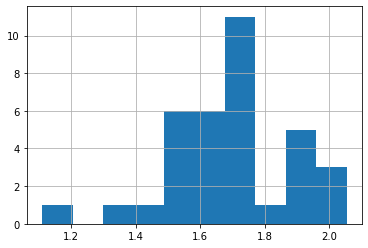

In [85]:
dfsoil.Soil1.hist();

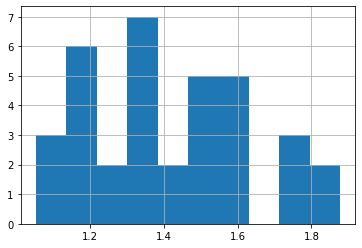

In [86]:
dfsoil.Soil2.hist();

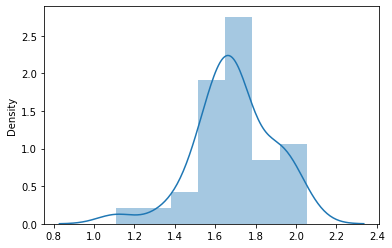

In [87]:
sns.distplot(x=dfsoil.Soil1, hist=True);

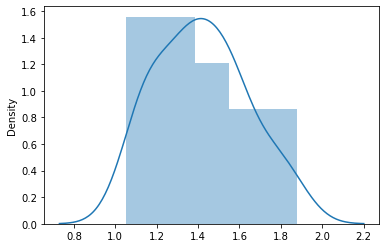

In [88]:
sns.distplot(x=dfsoil.Soil2, hist=True);

çizdiğimiz grafiklere göre yaklaşık olarak normal dist var diyebiliriz.

burada p value alpha/2 olur. çünkü iki yönlüde olabileceği için alpha/2 bölünerek iki yandada inceleme yapıldı. p value 0.005 olur bu koşullarda.

In [89]:
stat,p=stats.shapiro(dfsoil["Soil1"])


In [90]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.005
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.951, p=0.125
Sample looks Gaussian (fail to reject H0)


In [91]:
stat,p=stats.shapiro(dfsoil["Soil2"])

In [92]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.005
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.401
Sample looks Gaussian (fail to reject H0)


shapiro analizi sonucu normal dist olduğunu gördük. fakat grafiklere bakarakda  onların zaten normal. dist. yakın bir dist olduğunu kabul edebiliriz.

şimdide 2 grup arasında varyans farklı diye levene testi yapıyoruz.

In [93]:
stat,p=stats.levene(dfsoil["Soil1"], dfsoil["Soil2"])

In [94]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.005
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=1.661, p=0.202
The population variances of group 1 and 2 are equal (fail to reject H0)


levene analizindende 2 grubun varyansı aynıymış.

In [95]:
twosample=stats.ttest_ind(dfsoil["Soil1"], dfsoil["Soil2"])
twosample

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [96]:
alpha = 0.005
p_value = twosample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.005 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


 yani h0 reject ettik böylece alpha 0.005 'e göre iki sample arasınad anlamlı fark var.'

#### EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [97]:
dfpisa = pd.read_csv("2015 PISA Test - Sheet1.csv", sep = ",")

dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [98]:
dfpisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [99]:
dfpisa.shape

(70, 6)

In [100]:
dfpisa.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [101]:
dfpisa.Continent_Code

0      EU
1      AS
2      SA
3      OC
4      EU
     ... 
65     AF
66     EU
67     SA
68    NaN
69     AS
Name: Continent_Code, Length: 70, dtype: object

In [102]:
dfpisa.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

 (AS, EU, AF, NA, SA, OC) bize soruda bunlar verilmiş fakat value_counts yaptığımızda NA olmadığını farkettim bu nedenle NaNları NA ile doldurdum.

In [103]:
dfpisa.Continent_Code.fillna("NA", inplace=True)

In [104]:
dfpisa.shape

(70, 6)

In [105]:
dfpisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


Descriptive statistics 

In [106]:
dfpisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', 'NA', 'AF'], dtype=object)

### 1. The descriptive analysis of EU

In [107]:
dfpisa_EU=dfpisa[dfpisa.Continent_Code=="EU"]

In [108]:
dfpisa_EU.shape

(37, 6)

In [109]:
dfpisa_EU.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,37.0,77.274888,12.425773,53.744979,68.6329,76.1840,87.479056,98.2000
Math,37.0,477.981449,35.150403,371.311400,464.0401,489.7287,503.722000,521.2506
Reading,37.0,476.164608,37.720545,351.741500,452.5143,487.2501,499.814600,526.4247
Science,37.0,478.299381,34.450616,383.682400,460.7749,490.2250,501.936900,534.1937


In [111]:
dfpisa_EU.var()

internet_users_per_100     154.399841
Math                      1235.550805
Reading                   1422.839540
Science                   1186.844969
dtype: float64

In [112]:
dfpisa_EU.corr()

,internet_users_per_100,Math,Reading,Science
internet_users_per_100,1.000000,0.640105,0.591298,0.621850
Math,0.640105,1.000000,0.946071,0.965628
Reading,0.591298,0.946071,1.000000,0.957500
Science,0.621850,0.965628,0.957500,1.000000


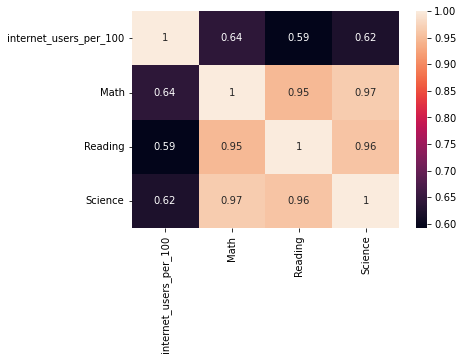

In [113]:
sns.heatmap(dfpisa_EU.corr(), annot=True);

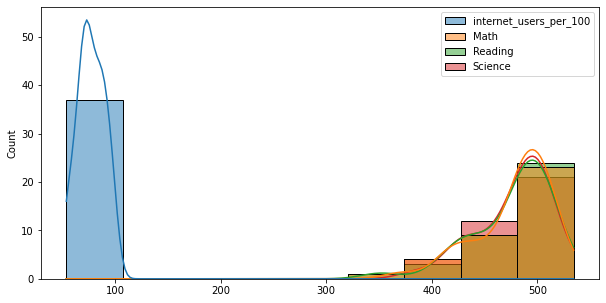

In [132]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(dfpisa_EU,kde=True);

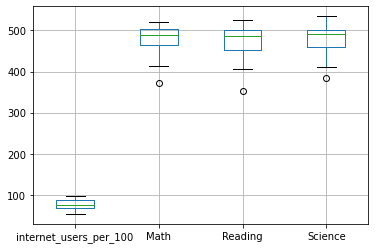

In [116]:
dfpisa_EU.boxplot();

Grafiklerdende gördüğümüz gibi EU'da math, Reading, Science ort. yaklaşık olarak aynıdır. math, reading science left skewed dist(negatif) sahiptir.

### 2. The descriptive analysis of AS

In [125]:
dfpisa_AS=dfpisa[dfpisa.Continent_Code=="AS"]

In [126]:
dfpisa_AS.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
11,CHN,AS,50.300000,531.2961,493.9412,517.7793
25,GEO,AS,47.569760,403.8332,401.2881,411.1315
27,HKG,AS,84.948353,547.9310,526.6753,523.2774
30,IDN,AS,21.976068,386.1096,397.2595,403.0997


In [127]:
dfpisa_AS.shape

(17, 6)

In [128]:
dfpisa_AS.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,17.0,68.455613,21.086060,21.976068,50.3000,74.0000,84.948353,92.884826
Math,17.0,466.216647,64.356490,380.259000,403.8332,459.8160,531.296100,564.189700
Reading,17.0,454.059682,57.048962,346.549000,408.1022,433.5423,508.690500,535.100200
Science,17.0,467.945847,56.671371,386.485400,417.6112,456.4836,523.277400,555.574700


In [129]:
dfpisa_AS.corr()

,internet_users_per_100,Math,Reading,Science
internet_users_per_100,1.000000,0.382206,0.358864,0.326062
Math,0.382206,1.000000,0.950766,0.976521
Reading,0.358864,0.950766,1.000000,0.967582
Science,0.326062,0.976521,0.967582,1.000000


In [130]:
dfpisa_AS.var()

internet_users_per_100     444.621918
Math                      4141.757822
Reading                   3254.584049
Science                   3211.644321
dtype: float64

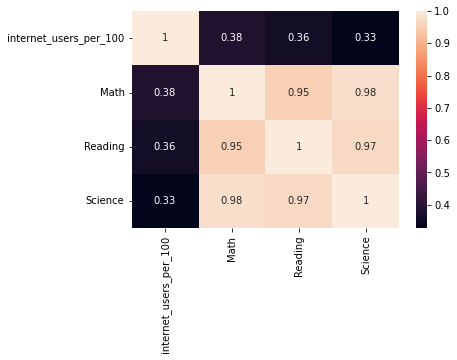

In [131]:
sns.heatmap(dfpisa_AS.corr(), annot=True);

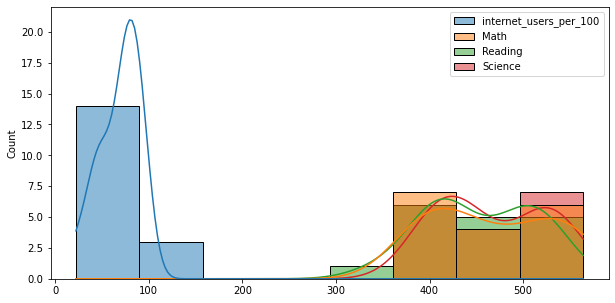

In [134]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(dfpisa_AS,kde=True);

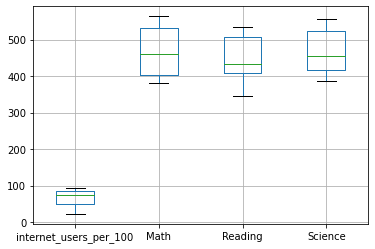

In [135]:
dfpisa_AS.boxplot();

Grafiklerdende AS'nin math ve science ort birbirine yakın olup ınternet_user_per_100 en düşük ortalamaya haizdir. math, reading science right skewed(pozitif) dağılımına sahiptir.

### 3. The descriptive analysis of SA

In [136]:
dfpisa_SA=dfpisa[dfpisa.Continent_Code=="SA"]
dfpisa_SA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
7,BRA,SA,58.327952,377.0695,407.3486,400.6821
10,CHL,SA,64.289000,422.6714,458.5709,446.9561
12,COL,SA,55.904973,389.6438,424.9052,415.7288
53,PER,SA,40.900000,386.5606,397.5414,396.6836
64,TTO,SA,69.198471,417.2434,427.2733,424.5905
67,URY,SA,64.600000,417.9919,436.5721,435.3630


In [137]:
dfpisa_SA.shape

(7, 6)

In [138]:
dfpisa_SA.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,7.0,60.180494,9.772455,40.9000,57.116462,64.2890,66.321532,69.198471
Math,7.0,402.887700,18.128894,377.0695,388.102200,409.0333,417.617650,422.671400
Reading,7.0,425.359229,19.709688,397.5414,416.126900,425.3031,431.922700,458.570900
Science,7.0,421.747186,18.470319,396.6836,408.205450,424.5905,433.794600,446.956100


In [139]:
dfpisa_SA.var()

internet_users_per_100     95.500869
Math                      328.656783
Reading                   388.471816
Science                   341.152678
dtype: float64

In [140]:
dfpisa_SA.corr()

,internet_users_per_100,Math,Reading,Science
internet_users_per_100,1.000000,0.700917,0.670150,0.756945
Math,0.700917,1.000000,0.829681,0.917029
Reading,0.670150,0.829681,1.000000,0.949564
Science,0.756945,0.917029,0.949564,1.000000


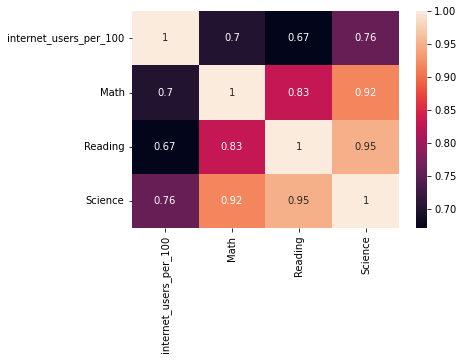

In [141]:
sns.heatmap(dfpisa_SA.corr(), annot=True);

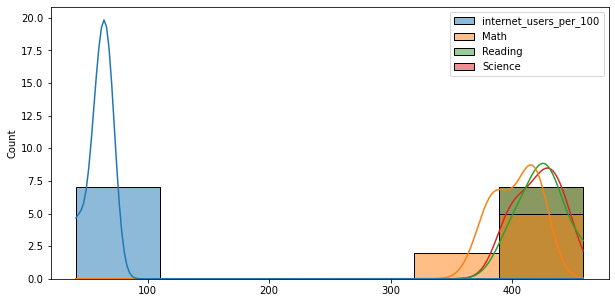

In [142]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(dfpisa_SA,kde=True);

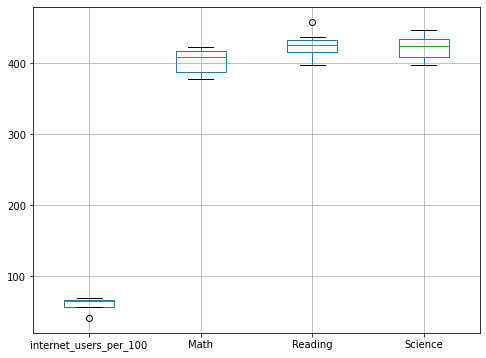

In [147]:
dfpisa_SA.boxplot(figsize=(8,6));

grafiklerden anlaşıldığı gibi reading ve science ort. birbirine yakın iken math biraz düşüktür. Onlara göre en düşük herzamnaki gibi internet_user_per_100 sahiptir. ve genel olarak distributionler normale yakındır. 

### 4. The descriptive analysis of OC

In [148]:
dfpisa_OC = dfpisa[dfpisa["Continent_Code"]=="OC"]
dfpisa_OC

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
52,NZL,OC,88.222889,495.2233,509.2707,513.3035


In [149]:
dfpisa_OC.shape

(2, 6)

In [150]:
dfpisa_OC.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,2.0,86.391704,2.589686,84.560519,85.476112,86.391704,87.307296,88.222889
Math,2.0,494.559750,0.938401,493.896200,494.227975,494.559750,494.891525,495.223300
Reading,2.0,506.085650,4.504341,502.900600,504.493125,506.085650,507.678175,509.270700
Science,2.0,511.648700,2.340241,509.993900,510.821300,511.648700,512.476100,513.303500


In [151]:
dfpisa_OC.var()

internet_users_per_100     6.706475
Math                       0.880597
Reading                   20.289087
Science                    5.476726
dtype: float64

### 5. The descriptive analysis of NA

In [158]:
dfpisa_NA = dfpisa[dfpisa["Continent_Code"]=="NA"]
dfpisa_NA

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
8,CAN,NA,88.470000,515.6474,526.6678,527.7047
13,CRI,NA,59.762950,400.2534,427.4875,419.6080
18,DOM,NA,54.215766,327.7020,357.7377,331.6388
45,MEX,NA,57.431043,408.0235,423.2765,415.7099
68,USA,NA,74.554202,469.6285,496.9351,496.2424


In [159]:
dfpisa_NA.shape

(5, 6)

In [160]:
dfpisa_NA.corr()

,internet_users_per_100,Math,Reading,Science
internet_users_per_100,1.000000,0.938760,0.939705,0.922947
Math,0.938760,1.000000,0.995240,0.994786
Reading,0.939705,0.995240,1.000000,0.998817
Science,0.922947,0.994786,0.998817,1.000000


In [161]:
dfpisa_NA.var()

internet_users_per_100     206.334814
Math                      5143.336351
Reading                   4437.524053
Science                   5896.691519
dtype: float64

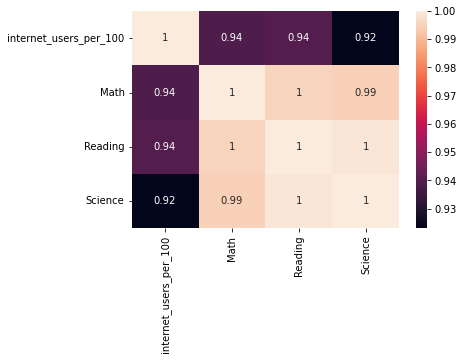

In [162]:
sns.heatmap(dfpisa_NA.corr(), annot=True);

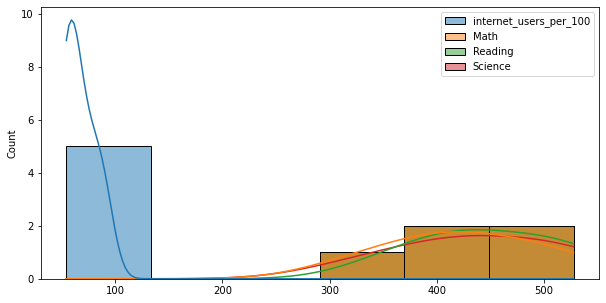

In [164]:
fig, axes = plt.subplots(figsize=(10,5))
sns.histplot(dfpisa_NA,kde=True);

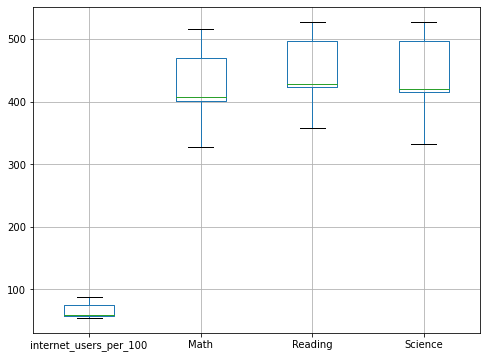

In [163]:
dfpisa_NA.boxplot(figsize=(8,6));

genel olarak distiributionler right skewed olup reading ve science ort birbirine cok yakın olup math biraz azdır en düşük internet_user..dir.

### 6. The descriptive analysis of AF

In [165]:
dfpisa_AF=dfpisa[dfpisa.Continent_Code=="AF"]

In [166]:
dfpisa_AF.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
65,TUN,AF,48.519836,366.8180,361.0555,386.4034


In [167]:
dfpisa_AF.shape

(2, 6)

In [168]:
dfpisa_AF.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,2.0,43.359918,7.297226,38.2000,40.779959,43.359918,45.939877,48.519836
Math,2.0,363.212100,5.099513,359.6062,361.409150,363.212100,365.015050,366.818000
Reading,2.0,355.457400,7.916909,349.8593,352.658350,355.457400,358.256450,361.055500
Science,2.0,381.074250,7.536556,375.7451,378.409675,381.074250,383.738825,386.403400


In [169]:
dfpisa_AF.var()

internet_users_per_100    53.249507
Math                      26.005030
Reading                   62.677447
Science                   56.799679
dtype: float64


### **(ii)Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.**

#### normal dist assume so that's why we can not make shapiro analyz and other assume is equal varr. we understood from this explanation we can pass levene analyz.

buarada notlar yüksekte alcakta olabilir böylece two tailed kullanmalıyız. (-alpha/2, alpha/2 ).ayrıca buarada 2 independent grup var sampleların mean yada var. hakkında biligimiz var ama populasyonun sigmasını bilmiyoruz. bu nedenle Z uygulayamayız t testi uygulayacağız. 

other assum is ci=0.95

 h0: Meu=Mas
 
h1: Meu!=Mas
        

In [170]:
dfpisa_EU.Math.head()

0    413.1570
4    496.7423
5    506.9844
6    441.1899
9    521.2506
Name: Math, dtype: float64

In [171]:
dfpisa_AS.Math.head()

1     427.4827
11    531.2961
25    403.8332
27    547.9310
30    386.1096
Name: Math, dtype: float64

In [172]:
dfpisa_EU.Math.mean()

477.98144864864867

In [173]:
dfpisa_AS.Math.mean()

466.2166470588236

In [175]:
twosample_pvalue=stats.ttest_ind(dfpisa_EU["Math"], dfpisa_AS["Math"], nan_policy='omit')
twosample_pvalue

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [195]:
alpha = 0.025
p_value = twosample_pvalue[1]

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.025 level of significance, we fail to reject the null hypothesis.


h0 fail to rejcet oldu. yani h0 doğruluğu devam etmektedir. yani eu ve as'nin math mean aynıdır. 

In [196]:
dfpisa_EU.Math.mean()-dfpisa_AS.Math.mean()

11.764801589825083

aslında basit matemetik ile yapıldığında 11.76 fark vark gözüküyor ama sample distribution of sample mean olarak incelediğimizde bu farkı göremedik aynı saydı.

#### **EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.**


buarada 2 biribirinden bağımlı (pair) grup var soruda bize t testi yapamamız belirtiliyor zaten populasyon varyansını bilmiyoruz(sigma)  z testi yapamayız. math ile eng arasında anlamlı bir fark var mı gibi 2 grup arasında farkın olup olmadığı sorgulandığı analizlerde pair(related analiz yöntemi kullanılır.)
bu durumda hipotezlerimiz:
    
    h0: diff=0
    
    h1: diff != 0

In [197]:
dfscor = pd.read_csv("students_2014.csv", sep = ",", na_values = ".", index_col = 0)

In [198]:
dfscor.head()

,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
ids,,,,,,,,,,,,,,,,,,,,,
43783,3/22/1995,NaN,NaN,NaN,NaN,0.0,0,72.35,NaN,0.0,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
20278,1/1/1995,NaN,NaN,NaN,Philosophy,0.0,0,70.66,179.20,0.0,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
20389,12/31/1994,NaN,NaN,NaN,NaN,0.0,0,70.68,198.52,0.0,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
22820,12/1/1994,NaN,NaN,NaN,business administration,1.0,0,NaN,198.34,NaN,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
24559,11/10/1994,NaN,NaN,NaN,NaN,1.0,1,67.43,128.17,2.0,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0


In [199]:
dfnew_scor=dfscor[["English","Math"]]

In [200]:
dfnew_scor.head()

,English,Math
ids,,
43783,88.24,60.02
20278,89.45,70.19
20389,96.73,71.20
22820,74.06,55.89
24559,82.61,65.52


In [201]:
dfnew_scor.shape

(435, 2)

In [202]:
dfnew_scor.describe().T

,count,mean,std,min,25%,50%,75%,max
English,409.0,82.787555,6.839803,59.83,78.3300,83.150,87.1700,101.95
Math,422.0,65.468009,8.375930,35.32,60.2025,65.445,70.5675,93.78


In [203]:
dfnew_scor.var()

English    46.782907
Math       70.156196
dtype: float64

In [204]:
dfnew_scor.isnull().sum()

English    26
Math       13
dtype: int64

In [205]:
dfnew_scor=dfnew_scor.dropna()

In [206]:
dfnew_scor.describe().T

,count,mean,std,min,25%,50%,75%,max
English,398.0,82.744095,6.844801,59.83,78.2250,83.145,87.1650,101.95
Math,398.0,65.446834,8.462137,35.32,60.2025,65.495,70.5225,93.78


In [207]:
dfnew_scor.shape

(398, 2)

In [189]:
dfnew_scor.sample(4)

,English,Math
ids,,
28044,85.18,73.09
39281,87.89,70.65
28053,88.16,58.27
36109,82.92,64.33


In [208]:
stat,p=stats.shapiro(dfnew_scor["English"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.997, p=0.573
Sample looks Gaussian (fail to reject H0)


In [209]:
stat,p=stats.shapiro(dfnew_scor["Math"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.025
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.994, p=0.157
Sample looks Gaussian (fail to reject H0)


shapiro analizindende anladığımız gibi iki grupta normal dist. yaklaşımına sahip.

In [210]:
stat,p=stats.levene(dfnew_scor["English"], dfnew_scor["Math"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.025
if p > alpha:
	print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
	print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=11.734, p=0.001
The population variances of group 1 and 2 are not equal (reject H0)


In [211]:
stats.ttest_rel(dfnew_scor["English"], dfnew_scor["Math"],nan_policy='omit')

Ttest_relResult(statistic=36.312568981719856, pvalue=3.0710987192210606e-128)

çift taraflı analiz yapıyoruz alpha/2 den 0.025 ile karşılaştıracağız. bu durumda p value 0.025 'ten cok küçük oluğu için h0 reject edilir. yani arasında fark varmış math ile eneg arasında